In [ ]:
pip install tensorflow

In [ ]:
pip install opencv-python

In [3]:
!sudo apt-get update -y

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [66.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,309 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,907 kB]
Hit:13 https://ppa.launchp

In [4]:
!sudo apt-get install python3.10

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.8).
python3.10 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [5]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1

In [6]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.11   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.11   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [7]:
!python --version

Python 3.10.12


In [43]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [10]:
!sudo apt-get install python3-pip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,968 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.2 [340 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.5 [1,306 kB]
Fetched 1,677 kB in 0s (6,146 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog

In [11]:
!pip --version


pip 22.0.2 from /usr/lib/python3/dist-packages/pip (python 3.10)


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


In [4]:
!pip install tqdm


In [56]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [22]:
# train_path="https://drive.google.com/drive/folders/1q2AEi326zARxOp8yGok5B29l1wjDi7jq?usp=sharing/TRAIN"
# test_path="https://drive.google.com/drive/folders/1q2AEi326zARxOp8yGok5B29l1wjDi7jq?usp=sharing/TEST"

In [31]:
!pip install kaggle


In [32]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syedsafi001","key":"26a4b5a1a1cfa8331c08f32841b1cddf"}'}

In [33]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [34]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 99% 425M/427M [00:20<00:00, 23.7MB/s]
100% 427M/427M [00:20<00:00, 22.3MB/s]


In [57]:
import zipfile
import os

# Extract dataset
dataset_zip = "waste-classification-data.zip"
with zipfile.ZipFile(dataset_zip, "r") as zip_ref:
    zip_ref.extractall("dataset")  # Extract to 'dataset/' folder

# Check extracted files
print(os.listdir("dataset"))


['DATASET', 'dataset']


In [63]:
train_path = "/content/dataset/DATASET/TRAIN"
test_path = "/content/dataset/DATASET/TEST"


In [64]:
import pandas as pd

data_list = []

for category in os.listdir(train_path):
    category_path = os.path.join(train_path, category)

    if os.path.isdir(category_path):  # Ensure it's a folder
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            data_list.append([image_path, category])  # Append (image path, label)

data = pd.DataFrame(data_list, columns=["image", "label"])
print(data.shape)


(22564, 2)


In [66]:
#import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [67]:
#Visualization
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2260.25it/s]


In [68]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x7fa9b0bead90>,
 [Text(-1.131700724955093, -0.20433665636913256, 'Organic'),
  Text(1.1317007058237096, 0.20433676232660034, 'Recyclable')],
 [Text(-0.6396569314963568, -0.11549463186081406, '55.69%'),
  Text(0.6396569206829663, 0.11549469174981755, '44.31%')])

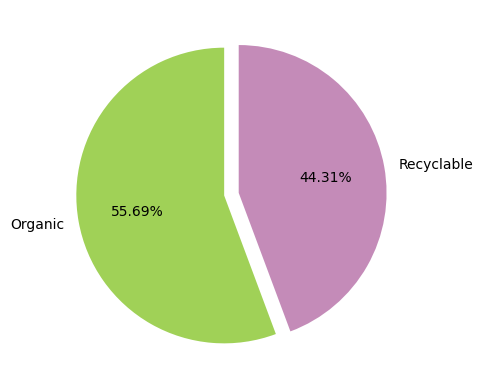

In [69]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05,0.05])

In [70]:
print(data.label.value_counts())  # Check if it contains values


label
O    12565
R     9999
Name: count, dtype: int64


In [71]:
print(data.head())  # View the first few rows
print(data.columns)  # Check column names
print(data.info())  # See if 'label' exists and has values


                                               image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
1  [[[221, 220, 192], [221, 220, 192], [221, 220,...     R
2  [[[127, 125, 128], [128, 126, 129], [128, 126,...     R
3  [[[250, 244, 248], [249, 243, 247], [249, 243,...     R
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
Index(['image', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22564 entries, 0 to 22563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   22564 non-null  object
 1   label   22564 non-null  object
dtypes: object(2)
memory usage: 352.7+ KB
None


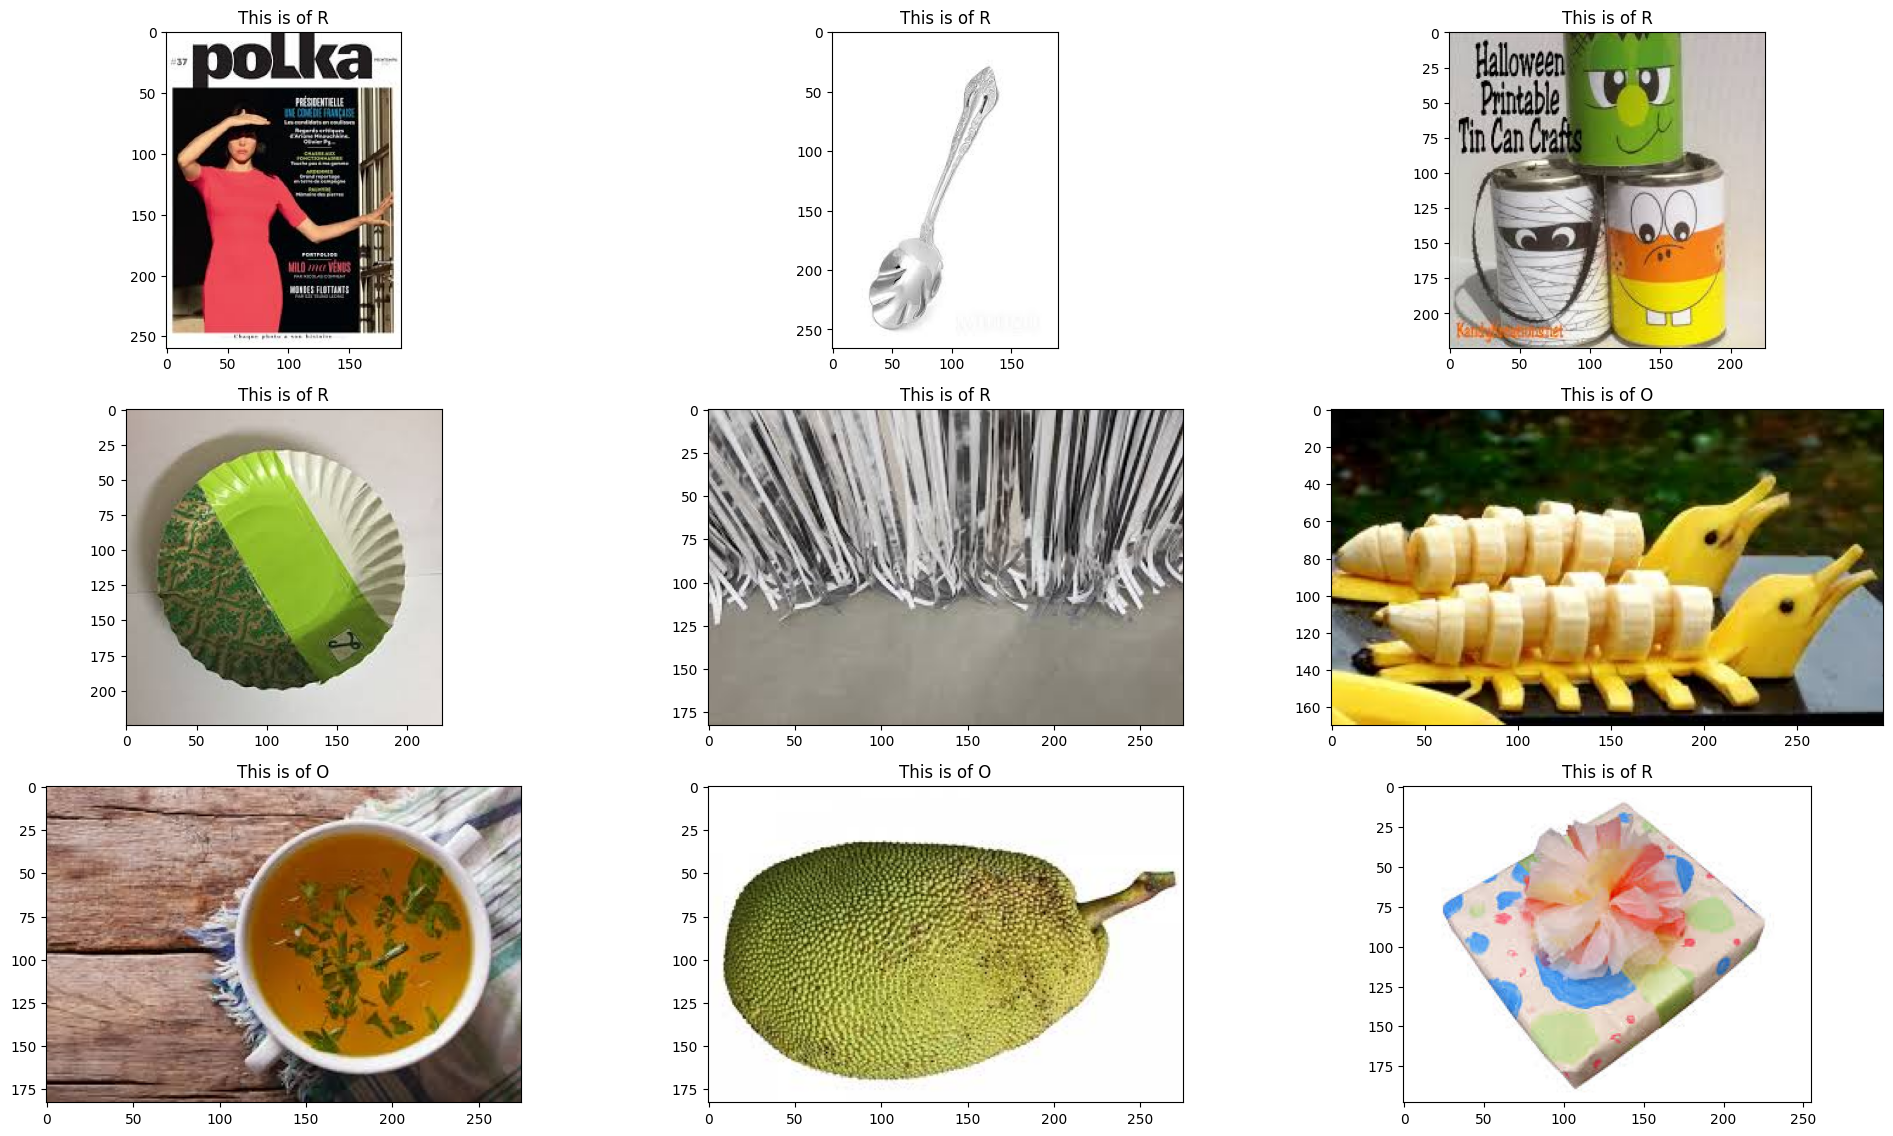

In [72]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolution Neural Network

In [73]:
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])
batch_size=256

In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [76]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [77]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [78]:
hist=model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)

Epoch 1/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 96s 802ms/step - accuracy: 0.6841 - loss: 0.6514 - val_accuracy: 0.8794 - val_loss: 0.3713
Epoch 2/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 577ms/step - accuracy: 0.8238 - loss: 0.4270 - val_accuracy: 0.8790 - val_loss: 0.3019


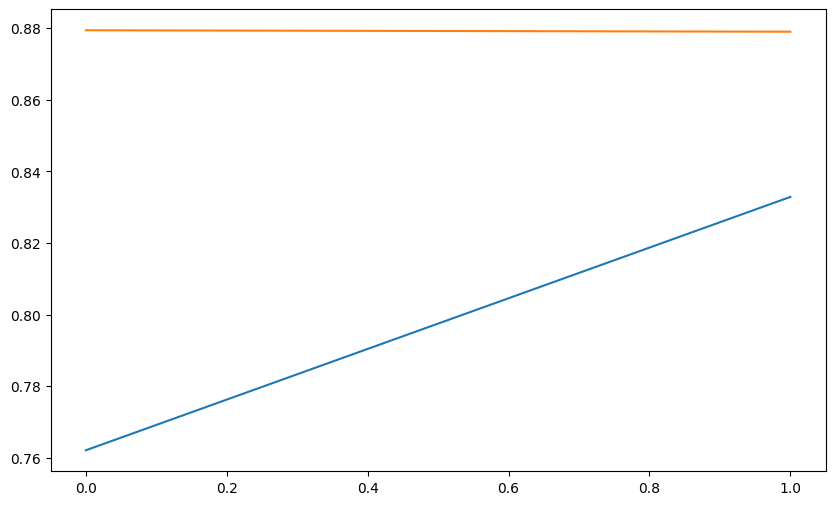

In [79]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.show()

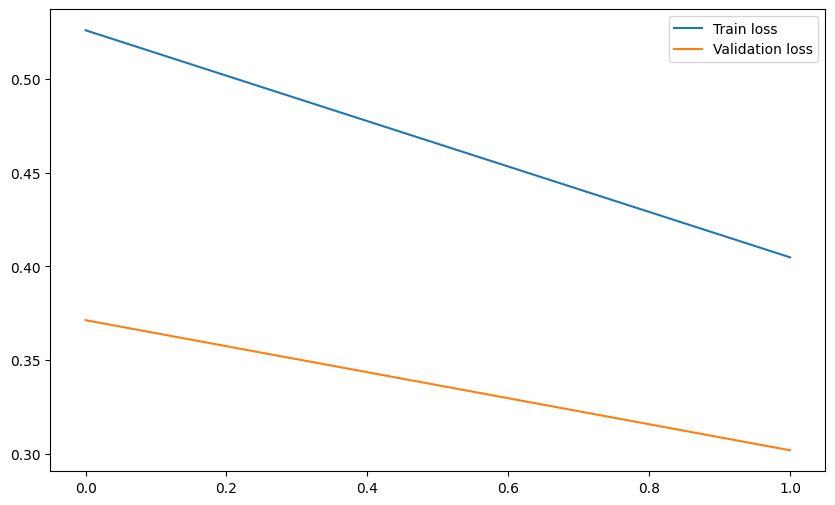

In [80]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [81]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This image shows organic waste


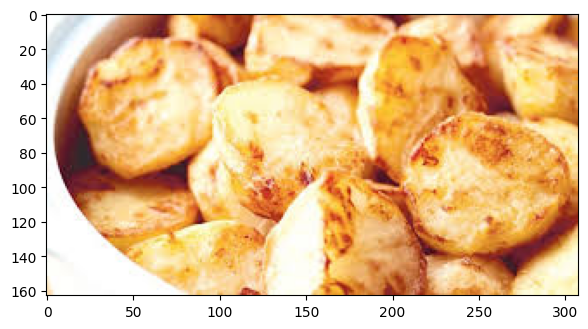

In [89]:
test_img = cv2.imread("/content/dataset/DATASET/TEST/O/O_12926.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This image shows organic waste


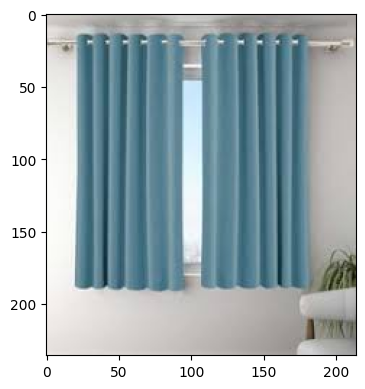

In [88]:
test_img = cv2.imread("/content/dataset/DATASET/TEST/R/R_10181.jpg")
predict_func(test_img)